In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [16]:
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [17]:

# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [18]:
FRAME_SIZE = 2048
HOP_SIZE = 512

debussy_spec = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
redhot_spec = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
duke_spec = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [19]:
#calculting band energy ratio
#find the BER
def calculate_split_frequency_bin(spectogtam, split_frequncy, sample_rate):
  freq_range = sample_rate / 2 
  frequncy_delta_pin = freq_range / spectogtam.shape[0]
  split_frequency_bin = np.floor(split_frequncy / frequncy_delta_pin)
  return int(split_frequency_bin)



In [20]:
split_frequency_bin

185

In [21]:
def calculate_bandenergy_ration(spectogram, split_frequncy,sample_rate):
  split_frequency_bin = calculate_split_frequency_bin(debussy_spec, 2000, 22050)
  power_spec = np.abs(spectogram)**2
  power_spec = power_spec.T

  band_energy_ration = [] 

  for frequunices_in_frame in power_spec:
    sum_power_low_frequncies = np.sum(frequunices_in_frame[:split_frequency_bin])
    sum_power_high_frequncies = np.sum(frequunices_in_frame[split_frequency_bin:])
    band_energy_ration.append(sum_power_low_frequncies / sum_power_high_frequncies)
  
  return np.array(band_energy_ration)

In [24]:
ber_debusy = calculate_bandenergy_ration(debussy_spec, 2000, sr)
ber_redhot = calculate_bandenergy_ration(redhot_spec, 2000, sr)

d:\python 3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass sr=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


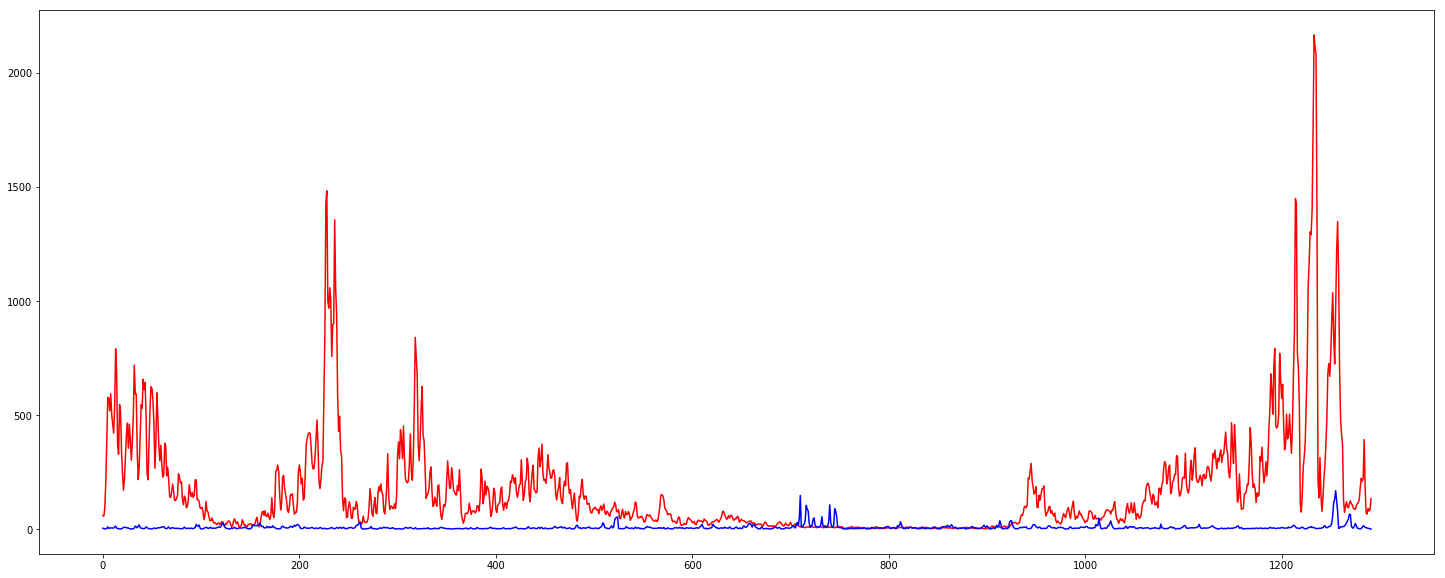

In [25]:
frames = range(len(ber_debusy))
t = librosa.frames_to_time(frames, 512)
plt.figure(figsize=(25,10))
plt.plot(t, ber_debusy, color='r')
plt.plot(t, ber_redhot, color='b')

plt.show()
 